<a href="https://colab.research.google.com/github/inekeyuliam/data-science-classification-python/blob/master/Logistic_Indian_Liver_Patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.dtypes
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Age
False    583
Name: Age, dtype: int64

Gender
False    583
Name: Gender, dtype: int64

Total_Bilirubin
False    583
Name: Total_Bilirubin, dtype: int64

Direct_Bilirubin
False    583
Name: Direct_Bilirubin, dtype: int64

Alkaline_Phosphotase
False    583
Name: Alkaline_Phosphotase, dtype: int64

Alamine_Aminotransferase
False    583
Name: Alamine_Aminotransferase, dtype: int64

Aspartate_Aminotransferase
False    583
Name: Aspartate_Aminotransferase, dtype: int64

Total_Protiens
False    583
Name: Total_Protiens, dtype: int64

Albumin
False    583
Name: Albumin, dtype: int64

Albumin_and_Globulin_Ratio
False    579
True       4
Name: Albumin_and_Globulin_Ratio, dtype: int64

Dataset
False    583
Name: Dataset, dtype: int64



In [ ]:
avg_norm_loss = df["Albumin_and_Globulin_Ratio"].astype("float").mean(axis=0)
df["Albumin_and_Globulin_Ratio"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
df['Total_Bilirubin'] = df['Total_Bilirubin'].astype('int')
df['Direct_Bilirubin'] = df['Direct_Bilirubin'].astype('int')
df['Total_Protiens'] = df['Total_Protiens'].astype('int')
df['Albumin'] = df['Albumin'].astype('int')
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].astype('int')


feature_df = df[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].values
df.dtypes
  

Age                            int64
Gender                        object
Total_Bilirubin                int64
Direct_Bilirubin               int64
Alkaline_Phosphotase           int64
Alamine_Aminotransferase       int64
Aspartate_Aminotransferase     int64
Total_Protiens                 int64
Albumin                        int64
Albumin_and_Globulin_Ratio     int64
Dataset                        int64
dtype: object

In [ ]:
feature_df.shape

(583, 10)

In [ ]:
X = np.asarray(feature_df)
X[0:5]

array([[65, 0, 0, 0, 187, 16, 18, 6, 3, 0],
       [62, 1, 10, 5, 699, 64, 100, 7, 3, 0],
       [62, 1, 7, 4, 490, 60, 68, 7, 3, 0],
       [58, 1, 1, 0, 182, 14, 20, 6, 3, 1],
       [72, 1, 3, 2, 195, 27, 59, 7, 2, 0]], dtype=object)

In [ ]:
y = np.asarray(df['Dataset'])
y [0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.25209764, -1.76228085, -0.43493391, -0.42401764, -0.42671496,
        -0.35466541, -0.31839333, -0.06347497,  0.31878583, -0.96170454],
       [ 1.06663704,  0.56744644,  1.16283843,  1.38301662,  1.68262856,
        -0.09159933, -0.03433257,  0.81761803,  0.31878583, -0.96170454],
       [ 1.06663704,  0.56744644,  0.68350673,  1.02160976,  0.82158795,
        -0.11352151, -0.14518555,  0.81761803,  0.31878583, -0.96170454],
       [ 0.81935624,  0.56744644, -0.27515668, -0.42401764, -0.44731402,
        -0.36562649, -0.31146502, -0.06347497,  0.31878583,  0.99869318],
       [ 1.68483904,  0.56744644,  0.04439779,  0.29879606, -0.39375647,
        -0.29437943, -0.17636295,  0.81761803, -0.84279003, -0.96170454]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (466, 10) (466,)
Test set: (117, 10) (117,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
lr

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = lr.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [ ]:
yhatprob = lr.predict_proba(X_test)
yhatprob


array([[0.71968584, 0.28031416],
       [0.71238188, 0.28761812],
       [0.68362789, 0.31637211],
       [0.69024443, 0.30975557],
       [0.69269417, 0.30730583],
       [0.65839575, 0.34160425],
       [0.6427169 , 0.3572831 ],
       [0.65449232, 0.34550768],
       [0.65071693, 0.34928307],
       [0.63124941, 0.36875059],
       [0.75855893, 0.24144107],
       [0.653414  , 0.346586  ],
       [0.68004121, 0.31995879],
       [0.66061839, 0.33938161],
       [0.80918282, 0.19081718],
       [0.63660097, 0.36339903],
       [0.90348476, 0.09651524],
       [0.63812723, 0.36187277],
       [0.83468806, 0.16531194],
       [0.77959217, 0.22040783],
       [0.67758412, 0.32241588],
       [0.69893403, 0.30106597],
       [0.63134376, 0.36865624],
       [0.88188138, 0.11811862],
       [0.64287817, 0.35712183],
       [0.6280057 , 0.3719943 ],
       [0.68055083, 0.31944917],
       [0.72858188, 0.27141812],
       [0.77165168, 0.22834832],
       [0.64317587, 0.35682413],
       [0.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[80  0]
 [37  0]]


Confusion matrix, without normalization
[[80  0]
 [37  0]]


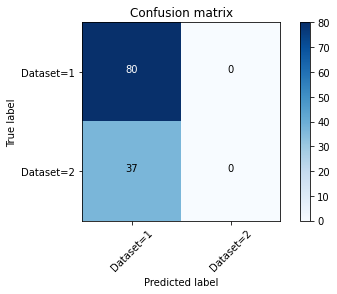

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Dataset=1','Dataset=2'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.68      1.00      0.81        80
           2       0.00      0.00      0.00        37

    accuracy                           0.68       117
   macro avg       0.34      0.50      0.41       117
weighted avg       0.47      0.68      0.56       117



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6837606837606838

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhatprob)

0.560895578007842